# PageRank
[이 글은 많은부분 조성문님의 블로그를 정리한 내용입니다.(바로가기)](https://sungmooncho.com/2012/08/26/pagerank/)

> 하이퍼링크를 가지는 웹 문서에 상대적 중요도에 따라 가중치를 부여하는 방법이다. 서로간의 인용과 참조로 연결된 임의의 묶음에 적용할 수 있다.(wikipedia)

출처: https://excelsior-cjh.tistory.com/93 [EXCELSIOR]

특정 페이지의 중요도는 페이지 사이의 연결관계가 유용한 정보를 제공해줄 수 있다.

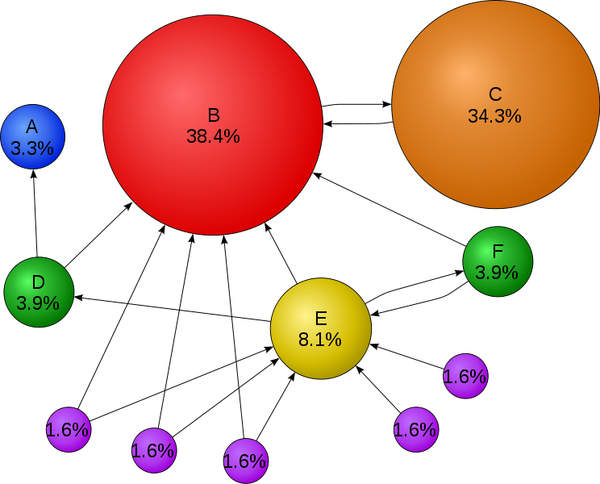

> 어떤 페이지 A의 페이지 랭크는 그 페이지를 인용하고 있는 다른 페이지 T1, T2, T3, ...이 가진 페이지 랭크를 '정규화시킨 값의 합'이다.

- 즉, 페이지 A의 페이지 랭크는 A라는 페이지를 가리키고 있는 다른 페이지의 랭크값이 높을수록 더 높아진다.
- 모든 웹페이지의 페이지 랭크 값을 합산하면 1이 된다.

$$
PR(A) = \frac{(1-d)}{N} + d(\frac{(PR(T1)}{C(T1)} + ... + \frac{PR(Tn)}{C(Tn))})
$$
- RP : PageRank  
- PR(A) : 'A'라는 웹페이지의 페이지 랭크  
- Tn : 그 페이지를 가리키는 다른 **페이지들**  
- PR(T1) : T1페이지의 랭크 값  
- C(T1) : T1이라는 페이지가 가지고 있는 링크의 개수  
- d(damping factor) : 웹 서핑하는 사람이 그 페이지에 만족하지 못하고 다른 페이지로 가는 링크를 클릭할 확률
    - 0과 1 사이의 값을 가지는 상수
    - d==1이면 위 수식에서 뒤의 합이 그대로 PR(A)가 된다.  
    - d==0이면 PR(A)=1이 되므로 의미가 없어진다. 논문에서는 0.85로 설정했다고 한다.

# TextRank
[EXCELSIOR님의 블로그와(바로가기)](https://excelsior-cjh.tistory.com/93)  
[
lovit님의 블로그를 참조했습니다.(바로가기)](https://lovit.github.io/nlp/2019/04/30/textrank/)

> PageRank가 높은 웹사이트는 많은 사이트로부터 링크를 받는 점에 착안하여 문서 내의 문장(혹은 단어)를 이용하여 문장의 ranking을 계산하는 알고리즘

## TextRank 구현 해보기
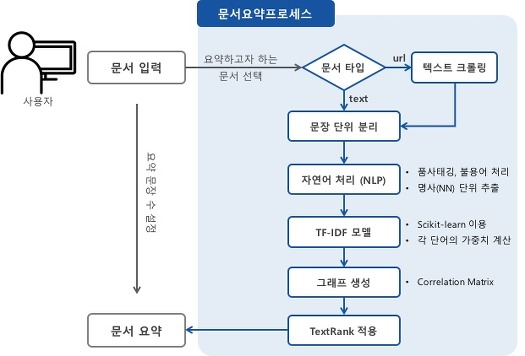

### TextRank based key-sentence extraction

문장간 유사도를 구하기 위해서 문장간 유사도 척도
$$similarity(S_i,S_j) = \frac{|\{w_k|w_k∈S_1\&w_k∈S_2\}|}{log|S_1|+log|S_2|}$$

- 최대값은 1이 아니다. 문장 길이가 길수록 높은 유사도를 지닌다.  
예) S1, S2가 모두 16개 단어로 구성, 이중 15개가 겹친다면 15/(4+4) = 1.85
    - 문장 길이에 log를 부여해서 문장 길이가 길어질수록 분모 값의 증가분은 줄어든다.
    
    
- 코사인 유사도로 유사도를 구할 수 있지만, 이것은 길이가 짧은 문장에 민감하게 반응할 수 있다.  
예) 다른 문장이 2개의 단어로 구성되어 있다면 하나의 단어만 함께 등장해도 절반이 넘는 단어가 공통으로 등장한 것이 된다.